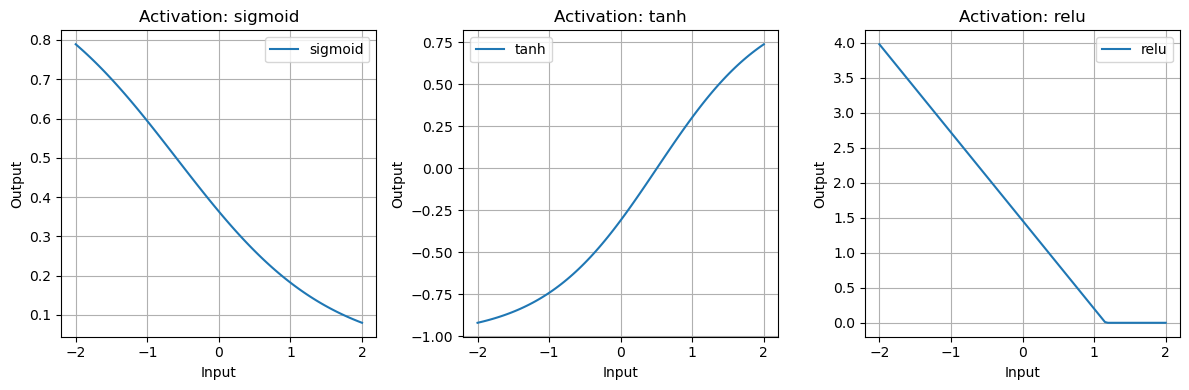

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)


def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)


class Neuron:
    def __init__(self, input_size, activation='sigmoid'):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.set_activation(activation)

    def set_activation(self, activation):
        if activation == 'sigmoid':
            self.activation = sigmoid
        elif activation == 'tanh':
            self.activation = tanh
        elif activation == 'relu':
            self.activation = relu
        else:
            raise ValueError(f"Unsupported activation: {activation}")

    def forward(self, inputs):
        z = np.dot(self.weights, inputs) + self.bias
        return self.activation(z)


def test_neuron():
    inputs = np.linspace(-2, 2, 100)
    input_data = np.array([inputs, inputs]) 

    activations = ['sigmoid', 'tanh', 'relu']
    plt.figure(figsize=(12, 4))

    for i, act in enumerate(activations):
        neuron = Neuron(input_size=2, activation=act)
        outputs = np.array([neuron.forward(np.array([x, x])) for x in inputs])

        plt.subplot(1, 3, i+1)
        plt.plot(inputs, outputs, label=f'{act}')
        plt.title(f'Activation: {act}')
        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()


test_neuron()
